In [5]:
library(MASS)
 
gaussprocess <- function(from = 0, to = 1, h=0.1,
                         start = 0, m = 1000) {
  # Simulates a Gaussian process with a given kernel
  #
  # args:
  #   from: numeric for the starting location of the sequence
  #   to: numeric for the ending location of the sequence
  #   K: a function that corresponds to the kernel (covariance function) of
  #      the process; must give numeric outputs, and if this won't produce a
  #      positive semi-definite matrix, it could fail; default is a Wiener
  #      process
  #   start: numeric for the starting position of the process
  #   m: positive integer for the number of points in the process to simulate
  #
  # return:
  #   A data.frame with variables "t" for the time index and "xt" for the value
  #   of the process
    
  K = function(s, t) {exp(-(s-t)^2/(2*h^2))}
   
  t <- seq(from = from, to = to, length.out = m)
  Sigma <- sapply(t, function(s1) {
    sapply(t, function(s2) {
      K(s1, s2)
    })
  })
   
  path <- mvrnorm(mu = rep(0.3, times = m), Sigma = Sigma)
  path <- path - path[1] + start  # Must always start at "start"
   
  return(data.frame("t" = t, "xt" = path))
}

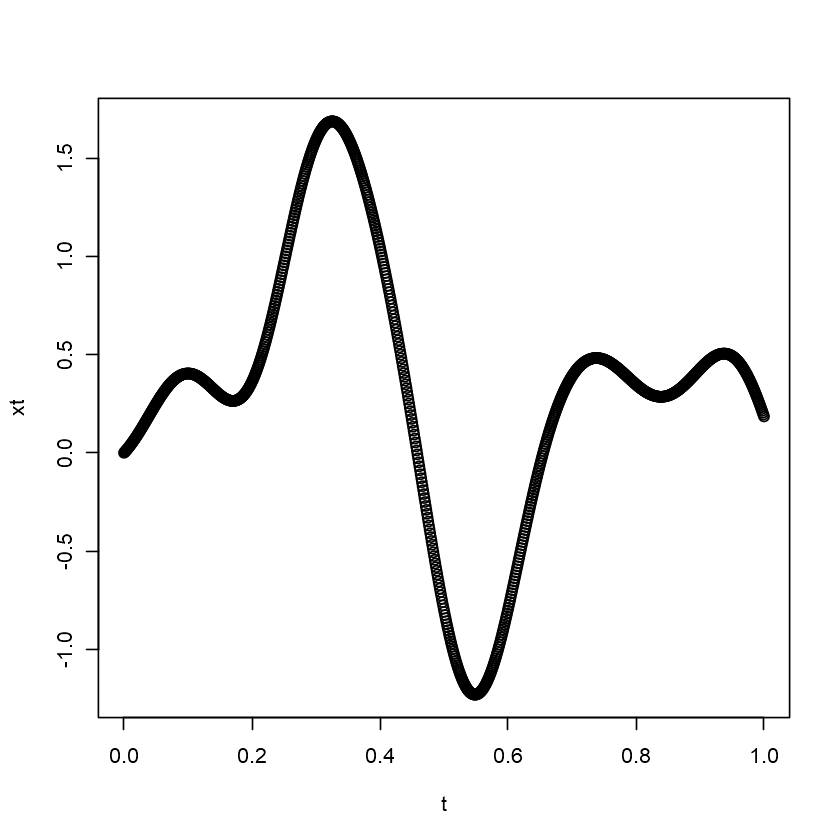

In [6]:
plot(gaussprocess())